# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
# from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to  our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


In [4]:
len(lats)
len (lngs)

1500

In [5]:
cities

['colares',
 'kruisfontein',
 'port alfred',
 'west island',
 'qaqortoq',
 'puerto natales',
 'grytviken',
 'port-aux-francais',
 'mahina',
 'edinburgh of the seven seas',
 'magadan',
 'kismayo',
 'puerto ayora',
 'naze',
 'whitehorse',
 'albany',
 'waitangi',
 'tralee',
 'hawaiian paradise park',
 'darab',
 'el aouinet',
 'georgetown',
 'totness',
 'hermanus',
 'karachi',
 'tolanaro',
 'the pas',
 'kingscliff',
 'mana',
 'bredasdorp',
 'toga village',
 'bethel',
 'montagu',
 'fortuna',
 'cable beach',
 'puerto san carlos',
 'invercargill',
 'guerrero negro',
 'afaahiti',
 'tindouf',
 'ribeira grande',
 'tazovsky',
 'ancud',
 'albert lea',
 'plumas lake',
 'blackmans bay',
 'east london',
 'gamba',
 'tobi village',
 'enewetak',
 'ladismith',
 'talnakh',
 'fuvahmulah',
 'ust-nera',
 'yagry',
 'taiohae',
 'atafu village',
 'smithers',
 'tarfaya',
 'burang',
 "nar'yan-mar",
 'mazaricos',
 'novaya igirma',
 'anadyr',
 'alamos',
 'aasiaat',
 'port lincoln',
 'hafar al-batin',
 'fale old set

In [6]:
type(lats),lats

(numpy.ndarray,
 array([ 39.03078344, -55.81201777, -44.18889367, ..., -76.34251973,
         88.4054844 ,  21.98664465]))

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_api_key = "6a99cfd9156c43b9a85ce9fab62c3b63"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#get weather data for London and convert reponse to json
response = requests.get(query_url + 'london')
weather_json = response.json()

# let's see the result
display(weather_json)

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 55.47,
  'feels_like': 55.13,
  'temp_min': 52.86,
  'temp_max': 57.15,
  'pressure': 979,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 180},
 'clouds': {'all': 40},
 'dt': 1697855357,
 'sys': {'type': 2,
  'id': 2006068,
  'country': 'GB',
  'sunrise': 1697870029,
  'sunset': 1697907375},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [8]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colares
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | mahina
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | kismayo
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | tralee
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | darab
Processing Record 21 of Set 1 | el aouinet
Processing Record 22 of Set 1 | georg

Processing Record 38 of Set 4 | egilsstadir
Processing Record 39 of Set 4 | christchurch
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | bir el ater
Processing Record 42 of Set 4 | keflavik
Processing Record 43 of Set 4 | nizhnesortymskiy
Processing Record 44 of Set 4 | holualoa
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | achinsk
Processing Record 47 of Set 4 | fereydunshahr
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | waingapu
Processing Record 0 of Set 5 | beira
Processing Record 1 of Set 5 | jamestown
Processing Record 2 of Set 5 | brush
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | amal
Processing Record 5 of Set 5 | dakhla
Processing Record 6 of Set 5 | nabire
Processing Record 7 of Set 5 | kerikeri
Processing Record 8 of Set 5 | santiago de cao
Processing Record 9 of Set 5 | okha
Processing Record 10 of Set 5 | sorong
Processing Record 11 of Set 5 | cid

Processing Record 30 of Set 8 | reggane
Processing Record 31 of Set 8 | cambria
Processing Record 32 of Set 8 | barcelona
Processing Record 33 of Set 8 | sharm el-sheikh
Processing Record 34 of Set 8 | raduzhny
Processing Record 35 of Set 8 | chandbali
Processing Record 36 of Set 8 | at-bashi
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | seogwipo
City not found. Skipping...
Processing Record 39 of Set 8 | kelso
Processing Record 40 of Set 8 | ifakara
Processing Record 41 of Set 8 | coahuayana de hidalgo
Processing Record 42 of Set 8 | pedro juan caballero
Processing Record 43 of Set 8 | jaguarao
Processing Record 44 of Set 8 | balsas
Processing Record 45 of Set 8 | benjamin constant
Processing Record 46 of Set 8 | aktau
Processing Record 47 of Set 8 | loreto
Processing Record 48 of Set 8 | sinabang
Processing Record 49 of Set 8 | eyl
Processing Record 0 of Set 9 | vorgashor
Processing Record 1 of Set 9 | tarinkot
Processing Record 2 of Set 9 | handan
Process

Processing Record 17 of Set 12 | kumi
Processing Record 18 of Set 12 | kapuskasing
Processing Record 19 of Set 12 | i-n-salah
Processing Record 20 of Set 12 | valparaiso
Processing Record 21 of Set 12 | kolonia town
Processing Record 22 of Set 12 | fisterra
Processing Record 23 of Set 12 | marvdasht
City not found. Skipping...
Processing Record 24 of Set 12 | severobaykal'sk
Processing Record 25 of Set 12 | regina
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colares,38.7992,-9.4469,60.76,87,95,10.00,PT,1697855392
1,kruisfontein,-34.0033,24.7314,61.50,97,100,13.13,ZA,1697855393
2,port alfred,-33.5906,26.8910,63.18,98,100,1.99,ZA,1697855393
3,west island,-12.1568,96.8225,82.38,74,40,13.80,CC,1697855394
4,qaqortoq,60.7167,-46.0333,31.96,69,100,3.91,GL,1697855394


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
#city_data_df

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colares,38.7992,-9.4469,60.76,87,95,10.00,PT,1697855392
1,kruisfontein,-34.0033,24.7314,61.50,97,100,13.13,ZA,1697855393
2,port alfred,-33.5906,26.8910,63.18,98,100,1.99,ZA,1697855393
3,west island,-12.1568,96.8225,82.38,74,40,13.80,CC,1697855394
4,qaqortoq,60.7167,-46.0333,31.96,69,100,3.91,GL,1697855394


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

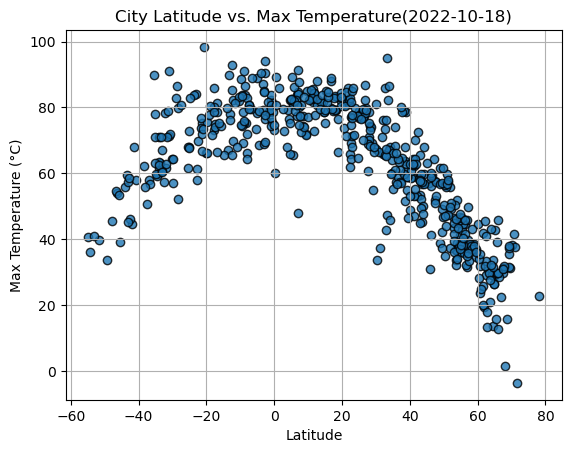

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature(2022-10-18)')
plt.ylabel('Max Temperature (°C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

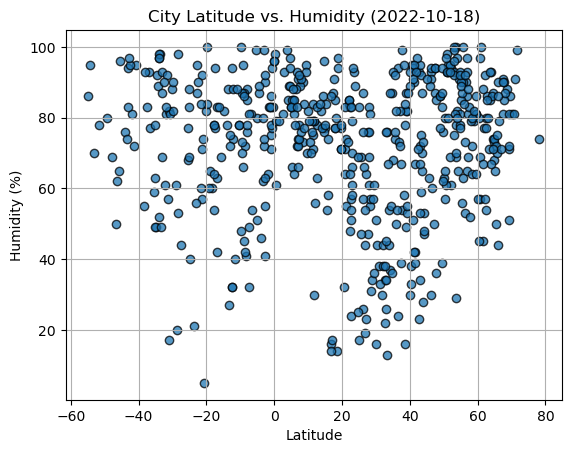

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

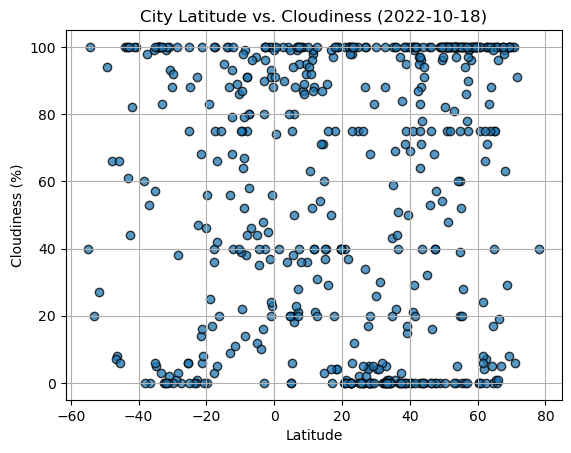

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

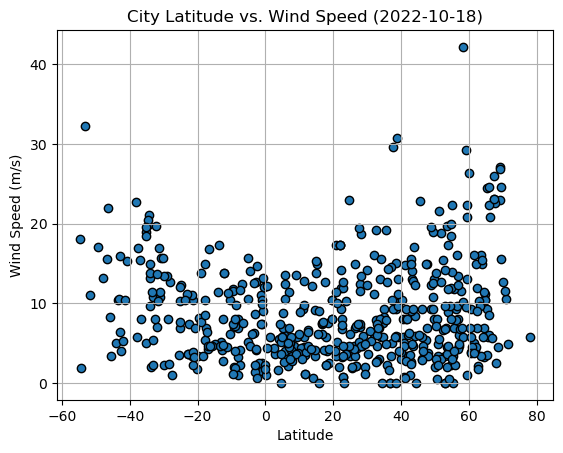

In [31]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values_temp = city_data_df["Wind Speed"]

# Incorporate other graph properties
plt.scatter(x_values, y_values_temp, marker="o", edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title, text_coordinates):
    
    # Calculate the linear regression model using scipy.stats.linregress
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regression_line = slope * X + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    y_pred = model.predict(x.reshape(-1, 1))
    
    # Create a scatter plot of the data points and the linear regression line
    plt.scatter(x, y, label='Data')
    plt.plot(x, y_pred, color='red', label='Linear Regression')
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Display the r-value
    print(f"The r-value is: {rvalue:.2f}")
    
    # Show plot
    plt.legend()
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# getting data from data frame
city_data_df = pd.DataFrame(city_data)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colares,38.7992,-9.4469,60.76,87,95,10.00,PT,1697855392
4,qaqortoq,60.7167,-46.0333,31.96,69,100,3.91,GL,1697855394
10,magadan,59.5667,150.8000,36.54,81,100,20.78,RU,1697855397
13,naze,28.3667,129.4833,74.32,55,68,18.70,JP,1697855398
14,whitehorse,60.7161,-135.0538,23.77,57,75,9.22,CA,1697855398


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# getting data from data frame
city_data_df = pd.DataFrame(city_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,kruisfontein,-34.0033,24.7314,61.50,97,100,13.13,ZA,1697855393
2,port alfred,-33.5906,26.8910,63.18,98,100,1.99,ZA,1697855393
3,west island,-12.1568,96.8225,82.38,74,40,13.80,CC,1697855394
5,puerto natales,-51.7236,-72.4875,39.70,78,27,11.10,CL,1697855394
6,grytviken,-54.2811,-36.5092,36.12,95,100,1.86,GS,1697855395


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7814339761371966


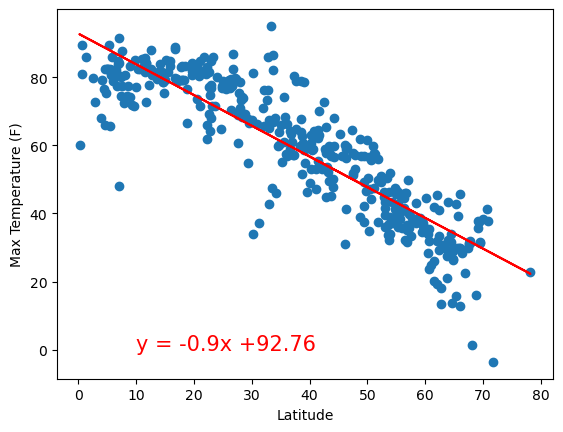

In [35]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# line for the graph
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# plot labels and the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq, (10,0), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


The r-value is: 0.5347052223858004


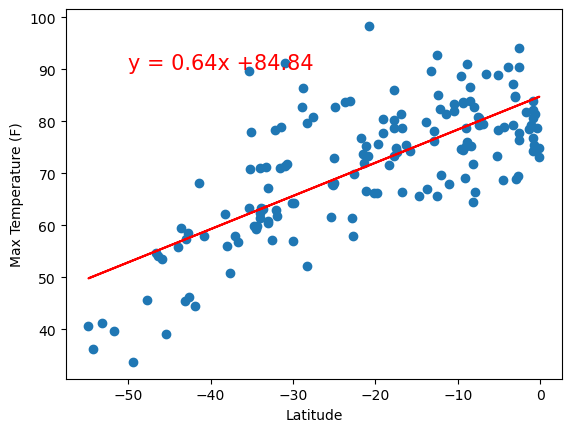

In [36]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# line for the graph
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# plot labels and the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq, (-50,90), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The data demonstrates a positive linear correlation between temperature and latitude in both the Northern and Southern Hemispheres. Specifically, the Northern Hemisphere exhibits a notably stronger positive linear relationship, while the Southern Hemisphere displays a moderately positive linear relationship between Temperature and Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007591820758798923


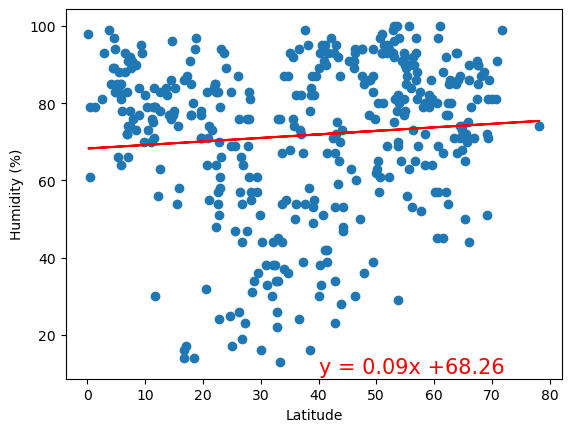

In [37]:
# Northern Hemisphere
# Lat and Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()

The r-value is: 0.004156403073172786


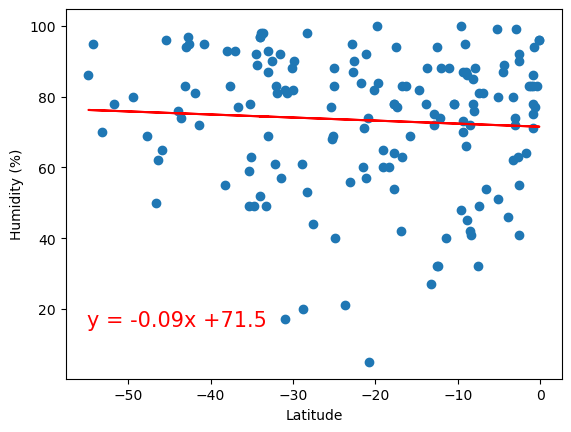

In [38]:
# Southern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (-55,15), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()


**Discussion about the linear relationship:* The values for both the Southern and Northern Hemispheres are in close proximity to zero, indicating an exceedingly weak linear relationship. The data points are widely dispersed, suggesting a lack of a meaningful connection between Humidity and Latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.017713310230716085


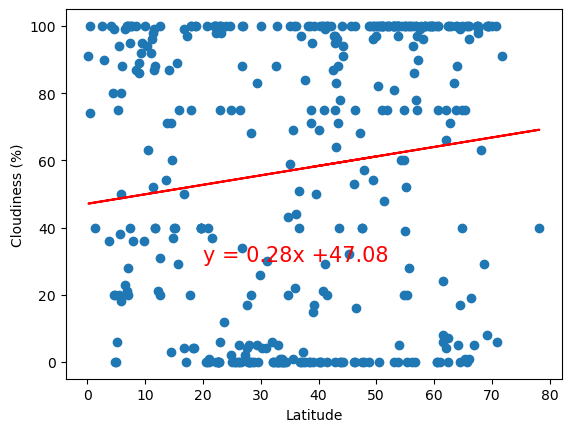

In [39]:
# Northern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept
# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (20,30), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()

The r-value is: 0.0022908470675636725


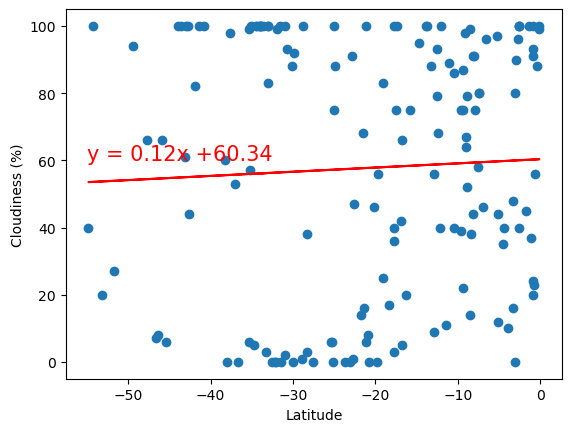

In [40]:
# Southern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (-55,60), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the data reveals values that are in extremely close proximity to zero. This suggests an exceptionally weak linear association between Cloudiness and Latitude in both regions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08697297128932685


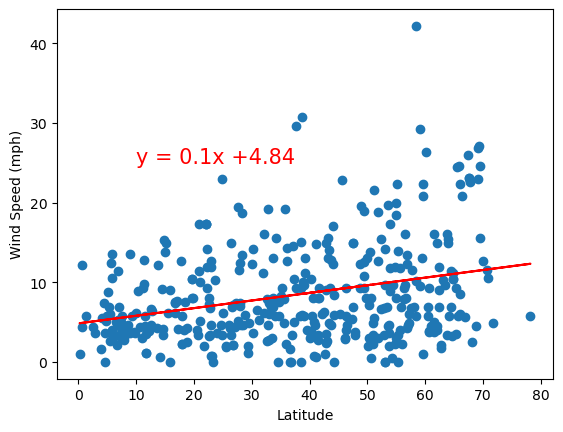

In [41]:
# Northern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Calculate the regression line ("y values") for the predicted wind speed.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (10,25), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()

The r-value is: 0.15322168939976832


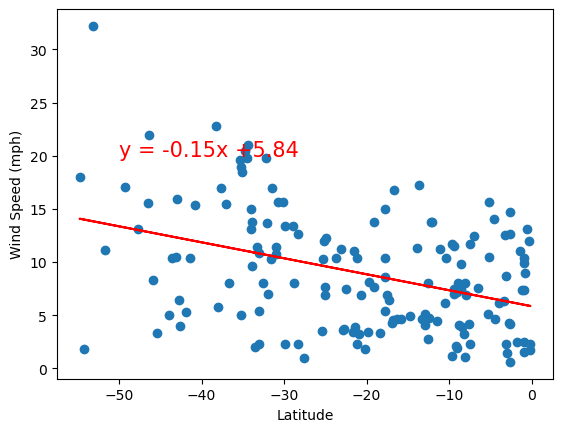

In [42]:
# Southern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
# Define and populate southern_hemi_df by filtering based on latitude
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Calculate the regression line ("y values") for the predicted wind speed.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()

**Discussion about the linear relationship:** Values for the Northern and Southern Hemispheres indicate a relatively weak positive linear relationship between Wind speed and Latitude.